In [1]:
import numpy as np

def kernel(x1, x2, length_scale=1.0, amplitude=1.0):
    """
    Define the Gaussian RBF (Radial Basis Function) Kernel/Covariance Function.
    """
    diff = np.subtract.outer(x1, x2)
    return amplitude**2 * np.exp(-0.5 * (diff / length_scale)**2)

# Define the mean function (usually set to zero in GP regression)
def mean_function(x):
    return np.zeros_like(x)


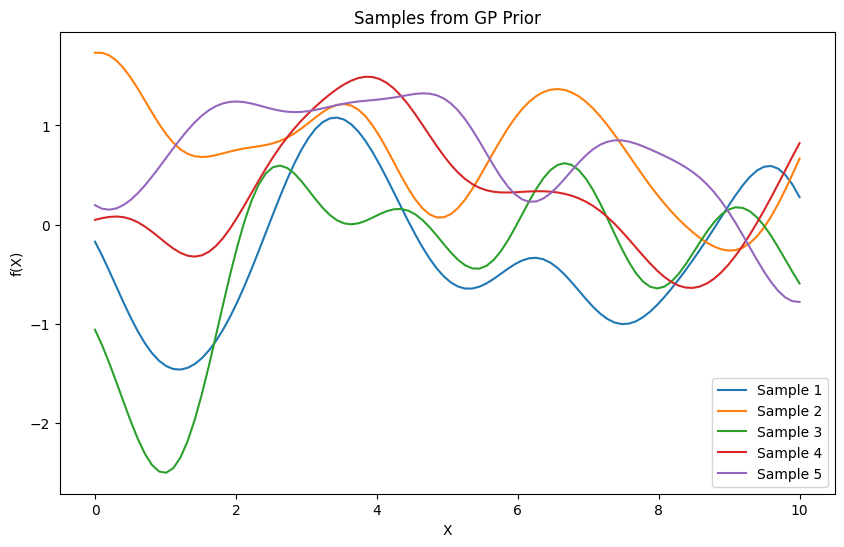

In [2]:
import matplotlib.pyplot as plt

# Define the input points
X_prior = np.linspace(0, 10, 100)

# Define the prior mean and covariance
prior_mean = mean_function(X_prior)
prior_cov = kernel(X_prior, X_prior)

# Sample functions from the prior
np.random.seed(42)  # Set a random seed for reproducibility
prior_samples = np.random.multivariate_normal(prior_mean, prior_cov, 5)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(X_prior, prior_samples[i], label=f'Sample {i + 1}')
plt.title('Samples from GP Prior')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()


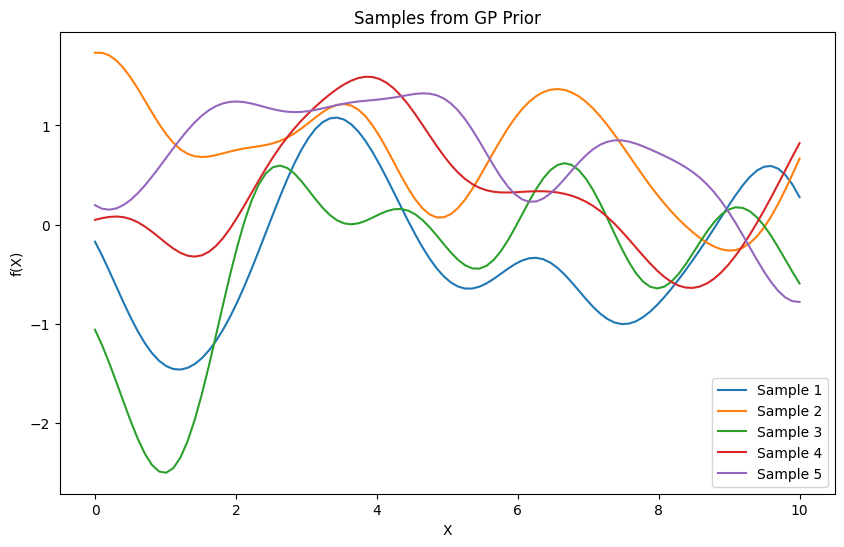

ValueError: shapes (1,100,1,3) and (3,1,3) not aligned: 3 (dim 3) != 1 (dim 1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian kernel
def kernel(x1, x2, length_scale=1.0, amplitude=1.0):
    diff = np.subtract.outer(x1, x2)
    return amplitude**2 * np.exp(-0.5 * (diff / length_scale)**2)

# Define the mean function (usually set to zero in GP regression)
def mean_function(x):
    return np.zeros_like(x)

# Sample functions from the GP prior
np.random.seed(42)

# Define the input points
X_prior = np.linspace(0, 10, 100)

# Define the prior mean and covariance
prior_mean = mean_function(X_prior)
prior_cov = kernel(X_prior, X_prior)

# Sample functions from the prior
prior_samples = np.random.multivariate_normal(prior_mean, prior_cov, 5)

# Plot the sampled functions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(X_prior, prior_samples[i], label=f'Sample {i + 1}')
plt.title('Samples from GP Prior')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

# Define the training data (input and output)
X_train = np.array([2, 4, 7]).reshape(-1, 1)  # Example training input points
y_train = np.array([0.5, 1.0, -0.2])  # Corresponding training output

# Compute the posterior mean and covariance
def posterior(X_train, y_train, X_test, length_scale=1.0, amplitude=1.0):
    K_train = kernel(X_train, X_train, length_scale, amplitude)
    K_test = kernel(X_train, X_test, length_scale, amplitude)
    K_inv = np.linalg.inv(K_train + 1e-6 * np.eye(len(X_train)))  # Adding small noise for stability
    
    # Calculate posterior mean
    posterior_mean = np.dot(K_test.T, np.dot(K_inv, y_train))
    
    # Calculate posterior covariance
    posterior_cov = kernel(X_test, X_test, length_scale, amplitude) - np.dot(K_test.T, np.dot(K_inv, K_test))
    
    return posterior_mean, posterior_cov

# Test points for prediction
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Compute the posterior
posterior_mean, posterior_cov = posterior(X_train, y_train, X_test)

# Plot the posterior mean and uncertainty (2 standard deviations)
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Training Data')
plt.plot(X_test, posterior_mean, 'b-', label='Posterior Mean')
plt.fill_between(X_test[:, 0], posterior_mean - 2 * np.sqrt(np.diag(posterior_cov)), posterior_mean + 2 * np.sqrt(np.diag(posterior_cov)), color='gray', alpha=0.3, label='Uncertainty (2 std)')
plt.title('GP Regression')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()
